In [72]:
import pandas as pd
import numpy  as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [49]:
Datos = pd.read_csv('C:/Users/USUARIO/Anexo 3 - Dataset Heart Disease Cleveland UCI/heart_cleveland_upload.csv')



In [51]:
Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [23]:
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

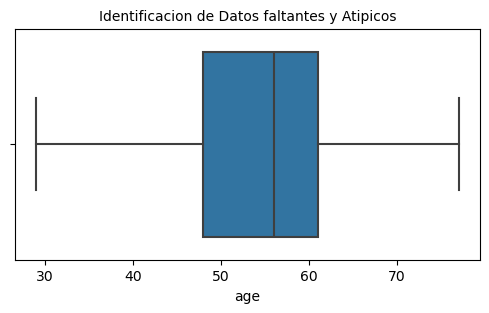

In [24]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['age'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

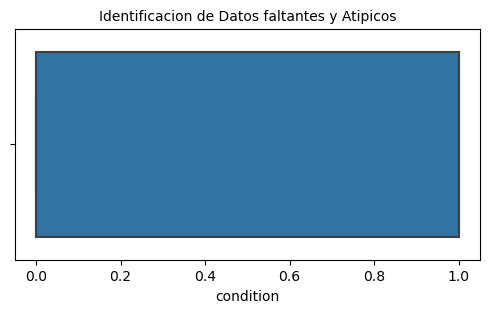

In [25]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['condition'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

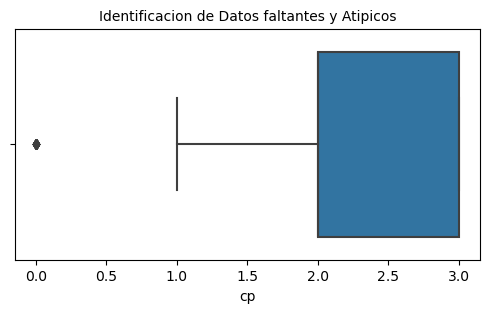

In [26]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

In [50]:
print("Cantidad de Registros con cero en Sexo:", Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Condicion:", Datos['condition'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo de Dolor en el pecho:", Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Azucar en Sangre en ayunas:", Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en Resultados Electrocardiográficos en reposo:", Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Angina inducida por el ejercicio:", Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en La pendiente del segmento ST del ejercicio máximo:", Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en Número de vasos principales (0-3) coloreados por fluoroscopia:", Datos['ca'].isin([0]).sum())


Cantidad de Registros con cero en Sexo: 96
Cantidad de Registros con cero en Condicion: 160
Cantidad de Registros con cero en Tipo de Dolor en el pecho: 23
Cantidad de Registros con cero en Azucar en Sangre en ayunas: 254
Cantidad de Registros con cero en Resultados Electrocardiográficos en reposo: 147
Cantidad de Registros con cero en Angina inducida por el ejercicio: 200
Cantidad de Registros con cero en La pendiente del segmento ST del ejercicio máximo: 139
Cantidad de Registros con cero en Número de vasos principales (0-3) coloreados por fluoroscopia: 174


In [51]:
Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['condition']=Datos['condition'].replace(0,Datos['condition'].mean())
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())
Datos['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos['slope']=Datos['slope'].replace(0,Datos['slope'].mean())
Datos['ca']=Datos['ca'].replace(0,Datos['ca'].mean())

In [27]:
print("Cantidad de Registros con cero en Sexo:", Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Condicion:", Datos['condition'].isin([0]).sum())
print("Cantidad de Registros con cero en Tipo de Dolor en el pecho:", Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Azucar en Sangre en ayunas:", Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en Resultados Electrocardiográficos en reposo:", Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Angina inducida por el ejercicio:", Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en La pendiente del segmento ST del ejercicio máximo:", Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en Número de vasos principales (0-3) coloreados por fluoroscopia:", Datos['ca'].isin([0]).sum())

Cantidad de Registros con cero en Sexo: 96
Cantidad de Registros con cero en Condicion: 160
Cantidad de Registros con cero en Tipo de Dolor en el pecho: 23
Cantidad de Registros con cero en Azucar en Sangre en ayunas: 254
Cantidad de Registros con cero en Resultados Electrocardiográficos en reposo: 147
Cantidad de Registros con cero en Angina inducida por el ejercicio: 200
Cantidad de Registros con cero en La pendiente del segmento ST del ejercicio máximo: 139
Cantidad de Registros con cero en Número de vasos principales (0-3) coloreados por fluoroscopia: 174


Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

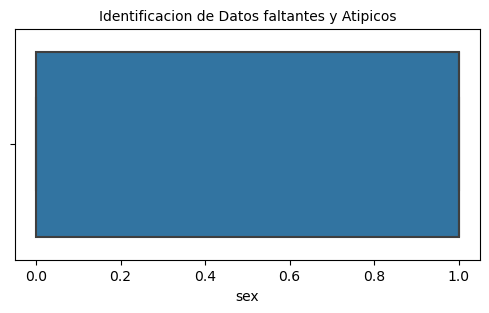

In [28]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['sex'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

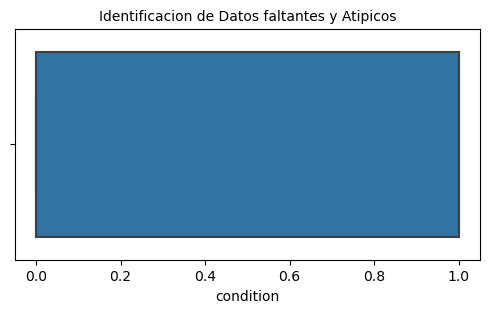

In [29]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['condition'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

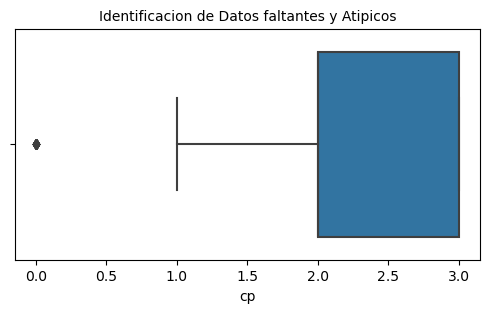

In [30]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['cp'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

In [38]:
#Conteo de datos atipicos
nivel_minimo=243
nivel_maximo=564
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print ("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 148


In [39]:
#Conteo de datos atipicos
nivel_minimo=1.6
nivel_maximo=6.2
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print ("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 212


Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

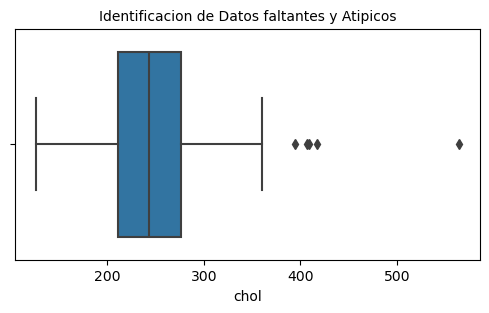

In [33]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['chol'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de Datos faltantes y Atipicos')

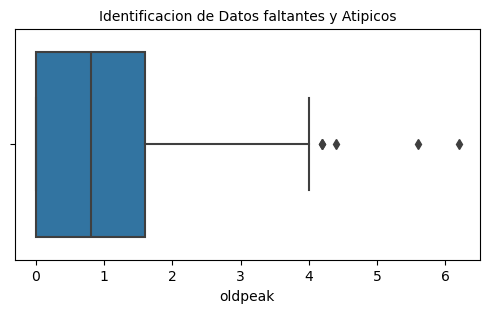

In [40]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=10)

In [42]:
# Filtro para los datos atipicos 
Datos=Datos[(Datos['chol']<nivel_minimo)&(Datos['chol']>nivel_maximo)]
Datos=Datos[(Datos['oldpeak']<nivel_minimo)&(Datos['oldpeak']>nivel_maximo)]

In [43]:
# Valida si se eliminaron los datos atipicos
Total_Atipicos=((Datos['chol']<nivel_minimo)|(Datos['chol']>nivel_maximo)).sum()
print ("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [44]:
# Valida si se eliminaron los datos atipicos
Total_Atipicos=((Datos['oldpeak']<nivel_minimo)|(Datos['oldpeak']>nivel_maximo)).sum()
print ("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 0


In [52]:
# Revision de tipo de datos y datos faltantes 
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
# 3. Selecciono si el paciente tiene una Enfermedad cardíaca Cleveland UCI
# caracteristica de interes:
# Enfermedad Cardiaca: si la persona tiene una enfermedad cardiaca o no (0= no tiene enfermedad cardiaca 1= si tiene enfermedad cardiaca
# Predecir si una  persona tiene una enfermedad cardiaca


In [53]:
# Total de personas con una enfermedad cardiaca 
Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [54]:
Datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [56]:
# 4 Se divide el dataset en Train y Test
X=Datos.drop('condition',axis=1)
Y=Datos['condition']


In [59]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.25, stratify=Y, random_state=0)

In [60]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [61]:
print (Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [63]:
# 5 Entrenar el modelo de regresion Logistica
modelo_regresion=LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train, Y_train)

Prediccion=modelo_regresion.predict(X_test)


In [65]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [66]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [68]:
# 6 Evaluar desempeño del modelo
print(classification_report(Y_test, Prediccion))


              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



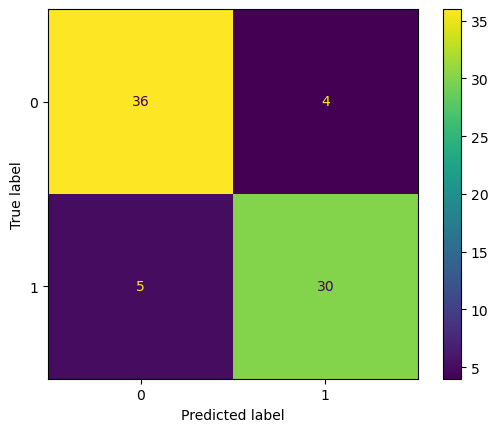

In [73]:
# 7 Realizar las diferentes graficas para ver los resultados del modelo 
# Matriz de confusion del modelo
cm = confusion_matrix(Y_test, Prediccion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

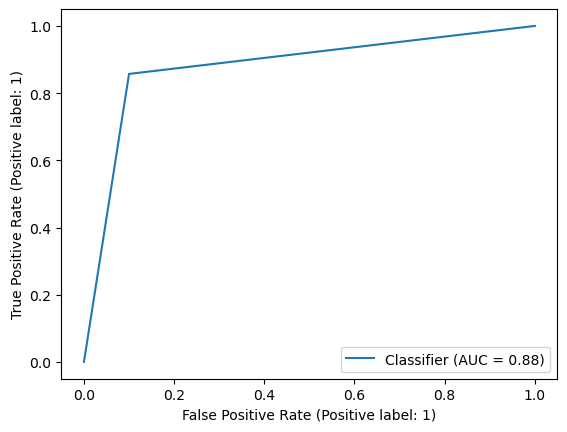

In [74]:
# Curva de precision del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test,Prediccion)
plt.show()